# 13.1 Bitly Data from 1.USA.gov

In [1]:
path = '/content/example.txt'

with open(path) as f:
  print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [2]:
import json

with open(path) as f:
  records = [json.loads(line) for line in f]
#The resulting object recors is now a list of Pythin dictionaries
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting Time Zones in pure Python

Finding the time zones that occur most oftern in the dataset **(tz field)**

In [5]:
#Let's extract a list of time zones again using a list comprehension

#time_zones = [rec["tz"] for rec in records] Turns out that not all of the records have a time zone field
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Produce counts by zone

In [6]:
def get_counts(sequence):
  counts = {}
  for x in sequence:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

In [7]:
#Using more advanced tools in the Python standard library
from collections import defaultdict #Default dict para crear un diccionario vacio

def get_counts2(sequence):
  counts = defaultdict(int) # values will initialize to 0
  for x in sequence:
    counts[x] += 1
  return counts

In [9]:
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [10]:
len(time_zones)

3440

In [18]:
#Wanted the top 10 time zones and their counts we can make a list of tuples and sort it
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort(reverse=True)
  return value_key_pairs[:n]

top_counts(counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [19]:
#Another easier way
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zone with pandas

In [20]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [21]:
frame["tz"].head()

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


In [22]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [24]:
#Fillin in a substitute value for unkown or missing time zone data in the records.
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


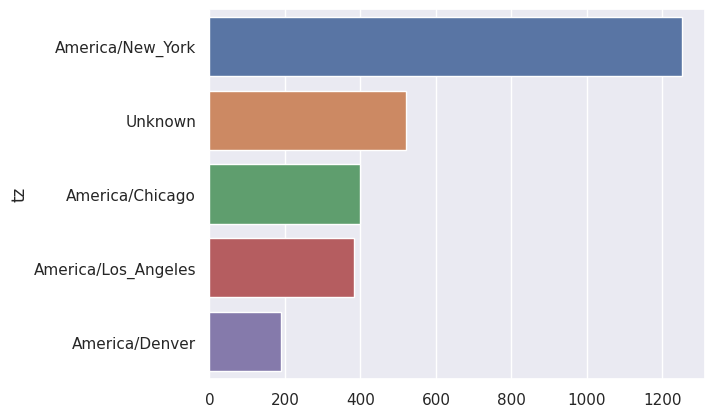

In [29]:
import seaborn as sns; sns.set()

subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy(), orient="h", hue=subset.index);

The a field contains information about the browser, device, or application used to perform the URL

In [32]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [33]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [34]:
frame["a"][51][:50] #Long line bring the first 50 carachteres

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [35]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()]) #Split() split off using delimiter (space)
results.head()

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


In [36]:
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


In [38]:
#Decompose the top time zones into Windows and non-Windows users.
#User is on windows if the string windows is in the agent String
import numpy as np
cframe = frame[frame["a"].notna()]
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe["os"].head(5)

<ipython-input-38-e493721a93c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")


,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


Grouo the data by its time zone column and this new list of operating systems

In [41]:
by_tz_os = cframe.groupby(["tz", "os"])


The group counts analogous to the `value_counts()` function can be computed with `size()`

In [46]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [58]:
indexer = agg_counts.sum(axis="columns").argsort() #Ordenelo por indice (Alfabeticamente)
indexer.head().sort_values()

,0
tz,
Africa/Cairo,20
Africa/Casablanca,21
,24
Africa/Johannesburg,87
Africa/Ceuta,92


In [52]:
indexer.values[-10:]

array([35, 78, 96, 59, 77, 15, 22, 12,  0, 29])

In [50]:
#Use take to select the rows in that order, slice off the last 10 rows (largest values)

count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Pandas has a convenience method called `nlargest` that does the same thing

In [59]:
agg_counts.sum(axis='columns').nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


Using seaborn `barplot` function

In [60]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


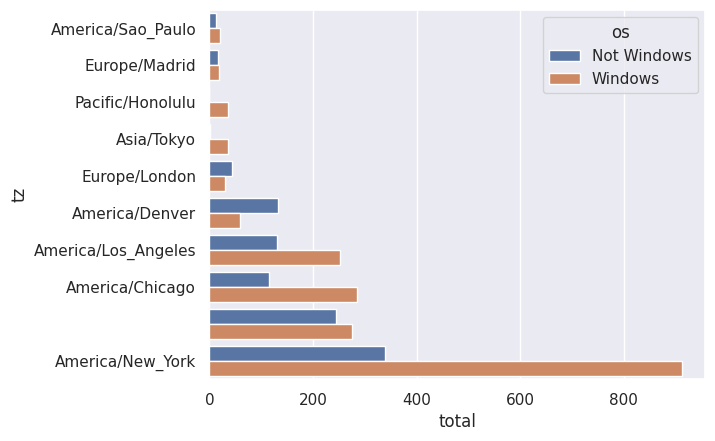

In [62]:
sns.barplot(x="total", y='tz', hue='os', data=count_subset);

Normalize the group percentages to sum to 1

<ipython-input-63-c6619967c050>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total) #Retorna el dataframe igualito pero con la columna añadida de la funcion


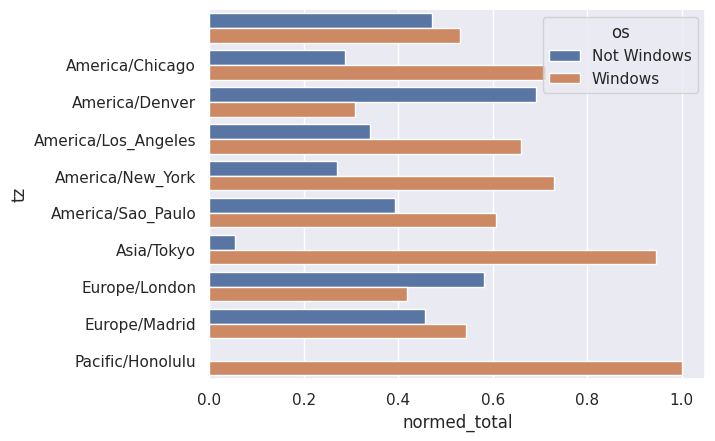

In [63]:
def norm_total(group):
  group["normed_total"] = group["total"] / group["total"].sum()
  return group

results = count_subset.groupby("tz").apply(norm_total) #Retorna el dataframe igualito pero con la columna añadida de la funcion
sns.barplot(x="normed_total", y='tz', hue='os', data=results);

Computed the normalized sum more efficiently by using the `transform` method with groupby

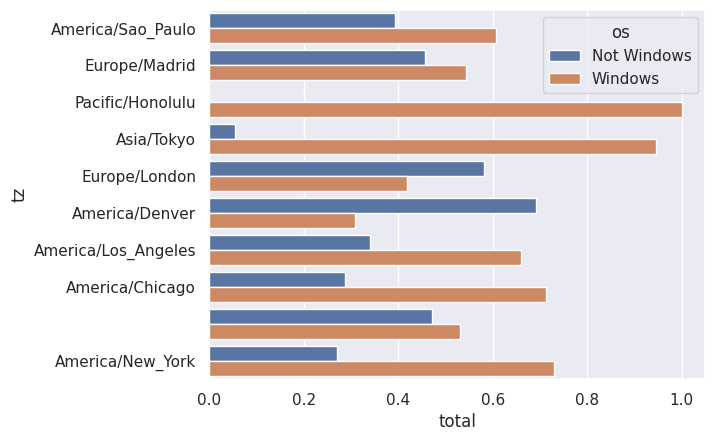

In [64]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")
sns.barplot(x=results2, y='tz', hue='os', data=count_subset);